# Create Graph Database (Paper_Keyword)

In [ ]:
import networkx as nx
import pandas as pd
from karateclub import DeepWalk
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

data = pd.read_csv("paper_keywords.csv")

G = nx.Graph()
i=0
paper_dict = {}
node_list = []
new_temp = ""
# Add nodes and relationships to the graph
for _, entry in data.iterrows():
    # Add Document (Paper) node
    paper_id = int(entry["paper_id"])
    paper_node_id = f"paper_{paper_id}"
    G.add_node(paper_node_id, node_type="Document", label="Document", name=entry["paper_id"])
    
    temp = paper_node_id
    if new_temp != temp:
        node_list.append(paper_node_id)
        new_temp = paper_node_id
        paper_loc = len(node_list) - 1
        paper_num = paper_node_id.replace("paper_", "")
        paper_dict[int(paper_num)] = int(paper_loc)
        
    # Add Keyword node
    keyword_id = int(entry["keyword_id"])
    keyword_node_id = f"keyword_{keyword_id}"
    G.add_node(keyword_node_id, node_type="Keyword", label="Keyword", name=entry["keyword_id"])
    node_list.append(keyword_node_id)
    
    # Add undirected relationships
    G.add_edge(paper_node_id, keyword_node_id, relationship="contains")
    i += 1
    if i >=1000:
        break
print(paper_dict)
# Separate nodes based on their types
document_nodes = [node for node, data in G.nodes(data=True) if data["node_type"] == "Document"]
keyword_nodes = [node for node, data in G.nodes(data=True) if data["node_type"] == "Keyword"]

# Draw the graph with different node colors for each type
pos = nx.spring_layout(G)  # You can use different layout algorithms as needed
nx.draw_networkx_nodes(G, pos, nodelist=document_nodes, node_color='lime', label="Document Nodes")
nx.draw_networkx_nodes(G, pos, nodelist=keyword_nodes, node_color='orange', label="Keyword Nodes")
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.9)

# Add labels
node_labels = {node: data["name"] for node, data in G.nodes(data=True)}
nx.draw_networkx_labels(G, pos, labels=node_labels)

G = nx.convert_node_labels_to_integers(G, first_label=0)

# Show the plot
plt.legend()
plt.show()

model = DeepWalk()
model.fit(G)
embeddings = model.get_embedding()
embeddings

# Create Graph Database (Paper_Author)

Graph Dataset Creation

In [ ]:
import networkx as nx
import pandas as pd
from karateclub import DeepWalk
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
# for i in tqdm(range(0, 100), desc ="Text You Want"):
#     pass
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
data = pd.read_csv("paper_author.csv")

G = nx.Graph()
i=0
paper_dict = {}
node_list = []
new_temp = ""
total_tqdm = len(data)
# Add nodes and relationships to the graph
for _, entry in tqdm(data.iterrows(), total = total_tqdm):
    # Add Document (Paper) node
    paper_id = int(entry["paper_id"])
    paper_node_id = f"paper_{paper_id}"
    G.add_node(paper_node_id, node_type="Document", label="Document", name=entry["paper_id"])
    
    # Get paper_id position in embedding array(Order of node creation)
    temp = paper_node_id
    if new_temp != temp:
        node_list.append(paper_node_id)
        new_temp = paper_node_id
        paper_loc = len(node_list) - 1
        paper_num = paper_node_id.replace("paper_", "")
        paper_dict[int(paper_num)] = int(paper_loc)
        
    # Add Author node
    author_id = int(entry["author_id"])
    author_node_id = f"author_{author_id}"
    G.add_node(author_node_id, node_type="Author", label="Author", name=entry["author_id"])
    node_list.append(author_node_id)
    
    # Add undirected relationships
    G.add_edge(paper_node_id, author_node_id, relationship="contains")
    i += 1
    # if i >=10000:
    #     break
# print(paper_dict)

# Separate nodes based on their types
document_nodes = [node for node, data in G.nodes(data=True) if data["node_type"] == "Document"]
author_nodes = [node for node, data in G.nodes(data=True) if data["node_type"] == "Author"]

# Draw the graph with different node colors for each type
pos = nx.spring_layout(G, seed=1) 
nx.draw_networkx_nodes(G, pos, nodelist=document_nodes, node_color='lime', label="Document Nodes")
nx.draw_networkx_nodes(G, pos, nodelist=author_nodes, node_color='orange', label="Author Nodes")
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.9)

# Add labels
node_labels = {node: data["name"] for node, data in G.nodes(data=True)}
print(node_labels)
nx.draw_networkx_labels(G, pos, labels=node_labels)
# Changes node_labels' dictionary labels to integers
G = nx.convert_node_labels_to_integers(G, first_label=0)
label_dict = {node: data["name"] for node, data in G.nodes(data=True)}
# Show the plot
plt.legend()
plt.show()

model = DeepWalk()
model.fit(G)
embeddings = model.get_embedding()
embeddings

Paper-Author Graph Save/Load

In [36]:
import pickle

# save graph object to file
pickle.dump(G, open('coauthor graph.pickle', 'wb'))

In [ ]:
import pickle

# load graph object from file
loaded_graph = pickle.load(open('PA.pickle', 'rb'))
loaded_graph.remove_edges_from(nx.selfloop_edges(loaded_graph))

document_nodes = [node for node, data in G.nodes(data=True) if data["node_type"] == "Document"]
author_nodes = [node for node, data in G.nodes(data=True) if data["node_type"] == "Author"]

pos_loaded = nx.spring_layout(loaded_graph, seed=1)

nx.draw_networkx_nodes(loaded_graph, pos_loaded, nodelist=document_nodes, node_color='lime', label="Document Nodes")
nx.draw_networkx_nodes(loaded_graph, pos_loaded, nodelist=author_nodes, node_color='aqua', label="Author Nodes")
nx.draw_networkx_edges(loaded_graph, pos_loaded, edge_color='gray', alpha=0.9)
nx.draw_networkx_labels(loaded_graph, pos_loaded, labels=label_dict)
plt.legend()
plt.show()

Paper_Citation_Author

  0%|          | 0/124437 [00:00<?, ?it/s]

  0%|          | 0/124437 [00:00<?, ?it/s]

{'paper_1': 1, 'author_57222542692': 57222542692, 'author_57225948306': 57225948306, 'paper_2': 2, 'paper_3': 3, 'author_7102005288': 7102005288, 'paper_6': 6, 'author_57203067431': 57203067431, 'paper_7305': 7305, 'citation_19938': 19938, 'citation_19939': 19939, 'citation_19940': 19940, 'citation_19941': 19941, 'citation_19942': 19942, 'citation_19943': 19943, 'paper_7304': 7304, 'citation_19944': 19944, 'citation_19945': 19945, 'paper_7303': 7303, 'citation_2354': 2354, 'citation_19946': 19946}


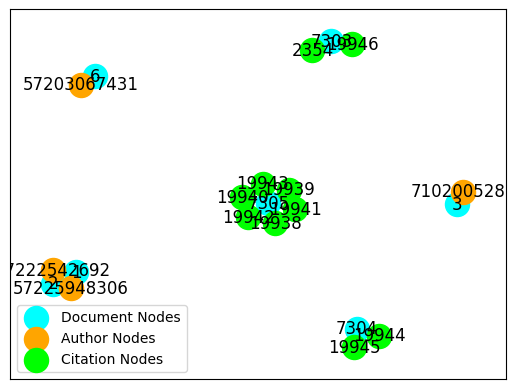

array([[-0.23557472,  0.11617869, -0.12672141, ..., -0.38135847,
         0.5054682 ,  0.38951787],
       [-0.23579621,  0.1006582 , -0.13782196, ..., -0.34689227,
         0.46166366,  0.33605203],
       [-0.23976831,  0.10124531, -0.13475473, ..., -0.37396792,
         0.49623317,  0.3804193 ],
       ...,
       [-0.2740418 ,  0.51262313,  0.03631844, ..., -1.0576867 ,
         0.53302675,  0.19938478],
       [-0.250671  ,  0.4598348 ,  0.00254583, ..., -0.8422481 ,
         0.4853579 ,  0.08454026],
       [-0.23794685,  0.45170686, -0.02152179, ..., -0.8490789 ,
         0.44644898,  0.1244043 ]], dtype=float32)

In [1]:
import networkx as nx
import pandas as pd
from karateclub import DeepWalk
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm


data = pd.read_csv("paper_author.csv")
data2 = pd.read_csv("paper_citation.csv")

G = nx.Graph()
i=0
paper_dict = {}
node_list = []
new_temp = ""
total_tqdm = len(data)
# Add nodes and relationships to the graph
for _, entry in tqdm(data.iterrows(), total = total_tqdm):
    # Add Document (Paper) node
    paper_id = int(entry["paper_id"])
    paper_node_id = f"paper_{paper_id}"
    G.add_node(paper_node_id, node_type="Document", label="Document", name=entry["paper_id"])
    
    # Get paper_id position in embedding array(Order of node creation)
    temp = paper_node_id
    if new_temp != temp:
        node_list.append(paper_node_id)
        new_temp = paper_node_id
        paper_loc = len(node_list) - 1
        paper_num = paper_node_id.replace("paper_", "")
        paper_dict[int(paper_num)] = int(paper_loc)
    # Add Author node
    author_id = int(entry["author_id"])
    author_node_id = f"author_{author_id}"
    G.add_node(author_node_id, node_type="Author", label="Author", name=entry["author_id"])
    node_list.append(author_node_id)
        
    # Add undirected relationships
    G.add_edge(paper_node_id, author_node_id, relationship="contains")
    i += 1
    if i >=10:
        break
# print(paper_dict)

for _, entry in tqdm(data2.iterrows(), total = total_tqdm):
    paper_id = int(entry["cited_paper_id"])
    paper_node_id = f"paper_{paper_id}"
    G.add_node(paper_node_id, node_type="Document", label="Document", name=entry["cited_paper_id"])

    # Add Citations node
    cite_id = int(entry["citing_paper_id"])
    cite_node_id = f"citation_{cite_id}"
    G.add_node(cite_node_id, node_type="Citation", label="Citation", name=entry["citing_paper_id"])
    # node_list.append(cite_node_id)
    G.add_edge(paper_node_id, cite_node_id, relationship="contains")
    i += 1
    if i >=20:
        break
# Separate nodes based on their types
document_nodes = [node for node, data in G.nodes(data=True) if data["node_type"] == "Document"]
author_nodes = [node for node, data in G.nodes(data=True) if data["node_type"] == "Author"]
cite_nodes = [node for node, data in G.nodes(data=True) if data["node_type"] == "Citation"]

# Draw the graph with different node colors for each type
pos = nx.spring_layout(G, seed=1) 
nx.draw_networkx_nodes(G, pos, nodelist=document_nodes, node_color='aqua', label="Document Nodes")
nx.draw_networkx_nodes(G, pos, nodelist=author_nodes, node_color='orange', label="Author Nodes")
nx.draw_networkx_nodes(G, pos, nodelist=cite_nodes, node_color='lime', label="Citation Nodes")
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.9)

# Add labels
node_labels = {node: data["name"] for node, data in G.nodes(data=True)}
print(node_labels)
nx.draw_networkx_labels(G, pos, labels=node_labels)
# Changes node_labels' dictionary labels to integers
G = nx.convert_node_labels_to_integers(G, first_label=0)
label_dict = {node: data["name"] for node, data in G.nodes(data=True)}
# Show the plot
plt.legend()
plt.show()

model = DeepWalk()
model.fit(G)
embeddings = model.get_embedding()
embeddings

Citations Graph Dataset Creation

C:\Users\www.SibeGilan.com\AppData\Roaming\Python\Python310\site-packages\networkx\drawing\nx_pylab.py:437: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


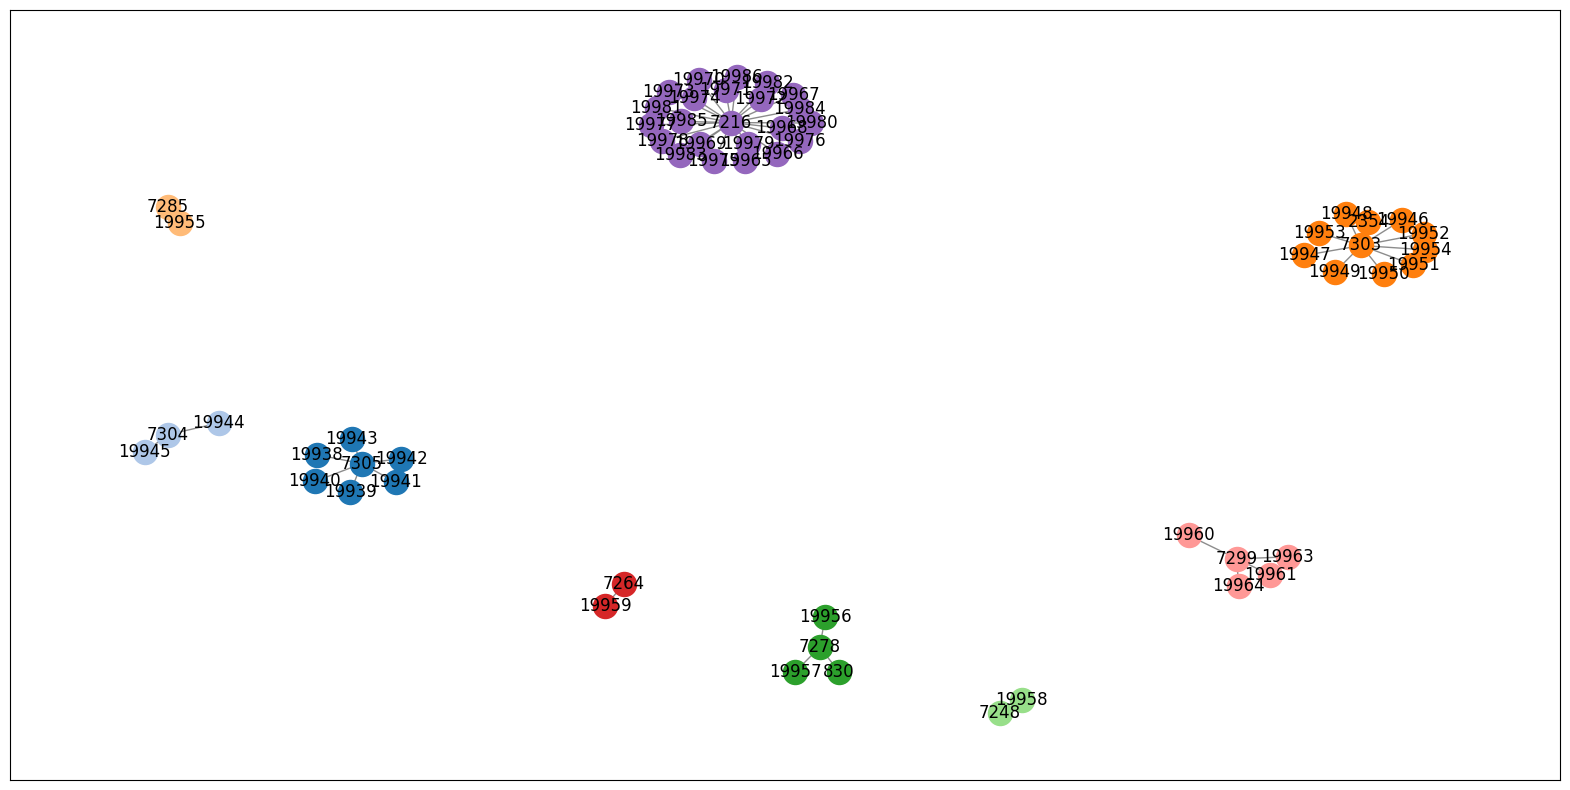

array([[ 0.38555026, -0.43536338, -0.45151103, ...,  0.37668222,
         0.6460323 , -0.4288422 ],
       [ 0.31776723, -0.32488528, -0.3708499 , ...,  0.27741674,
         0.5482833 , -0.3583074 ],
       [ 0.2885956 , -0.3089607 , -0.35559303, ...,  0.30580655,
         0.557709  , -0.3597535 ],
       ...,
       [-0.12145261, -0.47602376, -0.4774926 , ..., -0.26833123,
         0.26556647, -0.07344661],
       [-0.27250993, -0.41740394, -0.4010185 , ..., -0.35441682,
         0.26203755,  0.04961703],
       [-0.20688748, -0.39438885, -0.3191522 , ..., -0.28890708,
         0.20283507,  0.05222318]], dtype=float32)

In [46]:
import networkx as nx
import pandas as pd
from karateclub import DeepWalk
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
# for i in tqdm(range(0, 100), desc ="Text You Want"):
#     pass
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
data = pd.read_csv("paper_citation.csv")
data = data.head(50)
# Create an empty graph
Cg = nx.Graph()
auth_dict = {}
node_list = []
new_temp = ""
i=0
# Iterate over the rows in the DataFrame
for _, entry in data.iterrows():
    cited_id = entry["cited_paper_id"]
    citing_id = entry["citing_paper_id"]
    
    # Check if nodes for author_1 and author_2 already exist in the graph
    if not Cg.has_node(cited_id):
        Cg.add_node(cited_id, node_type="Citations", label="Citations", name=cited_id)
    
    if not Cg.has_node(citing_id):
        Cg.add_node(citing_id, node_type="Citations", label="Citations", name=citing_id)
    
    # Check if the edge between author_1 and author_2 already exists
    if not Cg.has_edge(cited_id, citing_id):
        Cg.add_edge(cited_id, citing_id, relationship="contains")
    # if i>=100:
    #     break
    # i+=1

# Separate nodes based on their types
citation_nodes = [node for node, data in Cg.nodes(data=True) if data["node_type"] == "Citations"]

# Draw the graph
plt.figure(figsize=(20, 10))
pos = nx.spring_layout(Cg, seed=1) 

clusters = list(nx.connected_components(Cg))

# Create a list of colors for clusters
color_list = list(plt.cm.tab20.colors)
color_cycle = cycle(color_list)

# nx.draw_networkx_nodes(Cg, pos, nodelist=citation_nodes, node_color='aqua', label="Citations Nodes")
    
node_color_map = {}
for color, cluster in zip(color_list, clusters):
    for node in cluster:
        node_color_map[node] = color

# Draw nodes with correct colors
for node, color in node_color_map.items():
    nx.draw_networkx_nodes(Cg, pos, nodelist=[node], node_color=color, label="Cluster {}".format(color_list.index(color)))

nx.draw_networkx_edges(Cg, pos, edge_color='gray', alpha=0.9)

# Add labels
node_labels = {node: data["name"] for node, data in Cg.nodes(data=True)}
nx.draw_networkx_labels(Cg, pos, labels=node_labels)
Cg = nx.convert_node_labels_to_integers(Cg, first_label=0)
label_dict = {node: data["name"] for node, data in Cg.nodes(data=True)}

Cg = nx.convert_node_labels_to_integers(Cg, first_label=0)
label_dict_Cg = {node: data["name"] for node, data in Cg.nodes(data=True)}

# Show the plot
# plt.legend()
plt.show()

model = DeepWalk()
model.fit(Cg)
embeddings_Cg = model.get_embedding()
embeddings_Cg

In [11]:
import numpy as np
#saving embeddings
np.save("Cg Embedding.npy", embeddings_Cg)
em = np.load("Cg Embedding.npy")
if em.all() == embeddings_Cg.all():
    print("True")

True


Co-citation

In [7]:
cited_citing = pd.DataFrame(columns=['cited','citing'])

# Find co-occurring authors for each author
def find_cocitations(graph, citing_node):
    """
    Finds co-citations based on a given citing node in a graph.

    This function iterates over the neighbors of the citing node in the graph.
    For each cited node connected to the citing node, it finds the neighboring nodes and adds them to the set
    if they are labeled as "Citation" and are not the original citing node.

    Parameters:
    graph (NetworkX graph): The graph representing the relationships between nodes.
    citing_node: The node representing the citing entity for which co-citations are to be found.

    Returns:
    set: A set containing the labels of co-citations, if there is at least one co-citation; otherwise, returns None.
    """
    
    cocitations = set()
    for cited_node in graph.neighbors(citing_node):
        for neighbor in graph.neighbors(cited_node):
            if "Citation" in graph.nodes[neighbor]["node_type"] and neighbor != citing_node:
                cocitations.add(label_dict[neighbor])
    if len(cocitations)>=1: return cocitations

for node, data in tqdm(G.nodes(data=True), total=6954):
    if "Citation" in data["node_type"]:
        cocitations = find_cocitations(G, node)
        # print(f"Author Node: {label_dict[node]}, Co-occurring Authors: {cooccurring_authors}")
        if cocitations is not None:
            for c in cocitations:
                new_row = {'citing': [label_dict[node]], 'cited': [c]}
                new_row_df = pd.DataFrame(new_row)
                cited_citing = pd.concat([cited_citing, new_row_df], ignore_index=True)

print(cited_citing)
cited_citing.to_csv("cited_citing.csv", index=False)

  0%|          | 0/6954 [00:00<?, ?it/s]

       cited citing
0      19939  19938
1      19940  19938
2      19941  19938
3      19942  19938
4      19943  19938
...      ...    ...
65155  26016  26017
65156  26021  26020
65157  26020  26021
65158  26024  26023
65159  26023  26024

[65160 rows x 2 columns]


Co-Citations Graph Database Creation

C:\Users\www.SibeGilan.com\AppData\Roaming\Python\Python310\site-packages\networkx\drawing\nx_pylab.py:437: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


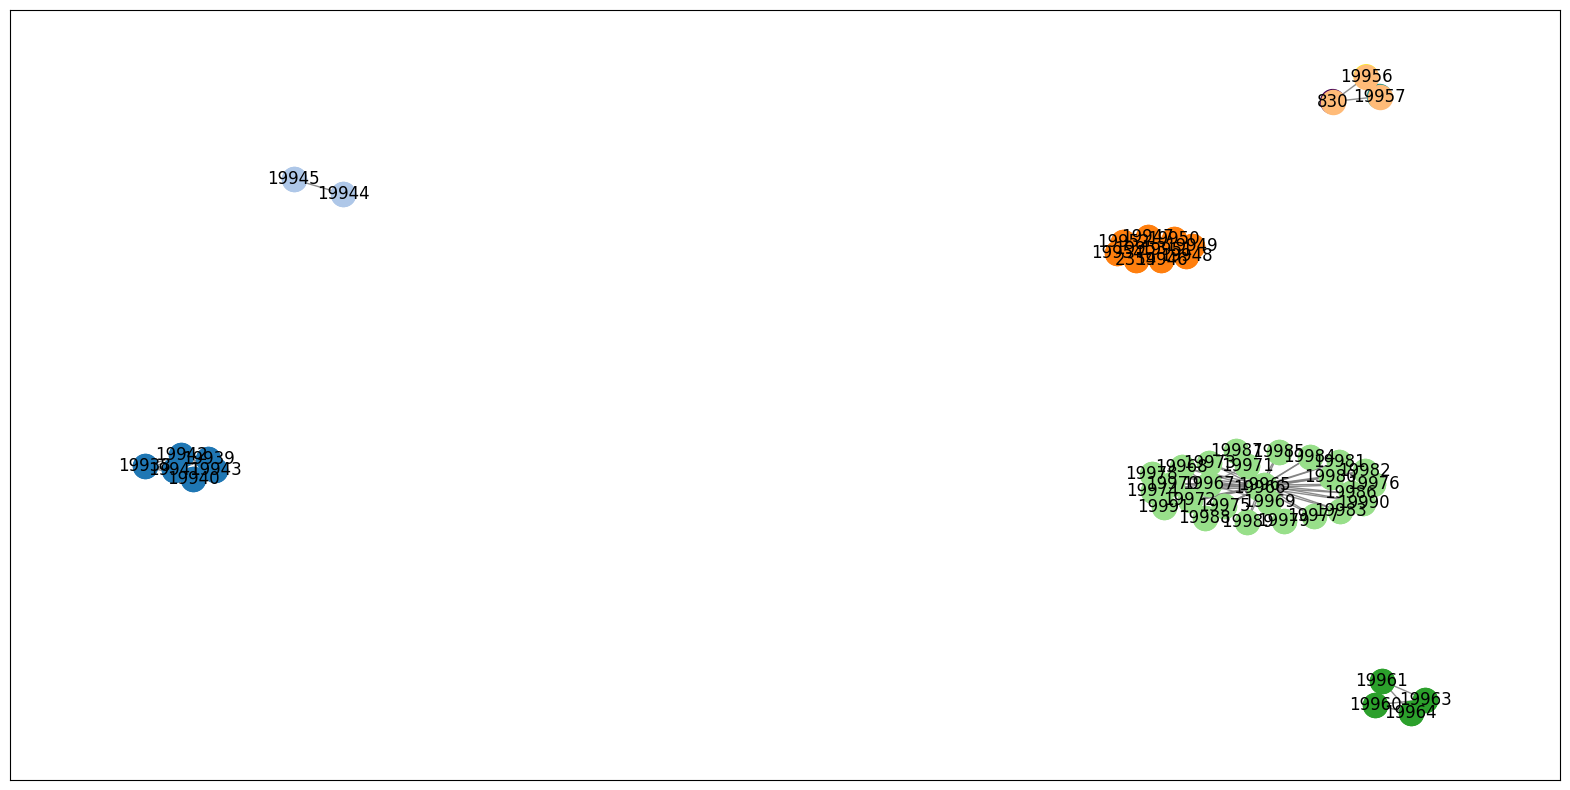

array([[-3.20314646e-01,  1.51392727e-04,  3.39175671e-01, ...,
         5.48473239e-01,  3.08808684e-01,  1.81316034e-04],
       [-3.39342386e-01, -2.72603333e-03,  3.60515237e-01, ...,
         5.85904419e-01,  3.15759540e-01,  6.56056684e-03],
       [-3.74679953e-01, -7.08395103e-03,  3.90596777e-01, ...,
         6.38279200e-01,  3.48921329e-01,  1.10409306e-02],
       ...,
       [-2.45957091e-01, -1.41089149e-02, -1.72889959e-02, ...,
         1.21245414e-01,  3.66634399e-01, -6.02548182e-01],
       [-4.43655670e-01, -4.06449176e-02, -1.15392543e-01, ...,
         1.04591288e-01,  5.51693320e-01, -8.26055229e-01],
       [-3.16644609e-01,  5.48054464e-04,  4.93081100e-03, ...,
         1.07368380e-01,  4.70589489e-01, -6.91168845e-01]], dtype=float32)

In [43]:
import networkx as nx
import pandas as pd
from karateclub import DeepWalk
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from itertools import cycle
# for i in tqdm(range(0, 100), desc ="Text You Want"):
#     pass
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
data = pd.read_csv("cited_citing.csv")
data = data.head(200)
# Create an empty graph
Cc = nx.Graph()
auth_dict = {}
node_list = []
new_temp = ""
i=0
# Iterate over the rows in the DataFrame
for _, entry in data.iterrows():
    cited_id = entry["cited"]
    citing_id = entry["citing"]
    
    # Check if nodes for author_1 and author_2 already exist in the graph
    if not Cc.has_node(cited_id):
        Cc.add_node(cited_id, node_type="Citations", label="Citations", name=cited_id)
    
    if not Cc.has_node(citing_id):
        Cc.add_node(citing_id, node_type="Citations", label="Citations", name=citing_id)
    
    # Check if the edge between author_1 and author_2 already exists
    if not Cc.has_edge(cited_id, citing_id):
        Cc.add_edge(cited_id, citing_id, relationship="contains")
    # if i>=100:
    #     break
    # i+=1

# Separate nodes based on their types
citation_nodes = [node for node, data in Cc.nodes(data=True) if data["node_type"] == "Citations"]

# Cluster nodes based on connectivity
clusters = list(nx.connected_components(Cc))

# Create a list of colors for clusters
color_list = list(plt.cm.tab20.colors)
color_cycle = cycle(color_list)

# Draw the graph
plt.figure(figsize=(20, 10))
pos = nx.spring_layout(Cc, seed=1) 

#  nx.draw_networkx_nodes(Cc, pos, nodelist=citation_nodes, node_color='aqua', label="Citations Nodes")
# for cluster in clusters:
#     color = next(color_cycle)
#     nx.draw_networkx_nodes(Cc, pos, nodelist=cluster, node_color=color, label="Citation Cluster {}".format(color_list.index(color)))
    
node_color_map = {}
for color, cluster in zip(color_list, clusters):
    for node in cluster:
        node_color_map[node] = color

# Draw nodes with correct colors
for node, color in node_color_map.items():
    nx.draw_networkx_nodes(Cc, pos, nodelist=[node], node_color=color, label="Cluster {}".format(color_list.index(color)))

nx.draw_networkx_edges(Cc, pos, edge_color='gray', alpha=0.9)

# Add labels
node_labels = {node: data["name"] for node, data in Cc.nodes(data=True)}
nx.draw_networkx_labels(Cc, pos, labels=node_labels)
Cc = nx.convert_node_labels_to_integers(Cc, first_label=0)
label_dict = {node: data["name"] for node, data in Cc.nodes(data=True)}

Cc = nx.convert_node_labels_to_integers(Cc, first_label=0)
label_dict_Cc = {node: data["name"] for node, data in Cc.nodes(data=True)}

# Show the plot
# unique_colors = list(set(color_list))
# legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label='Cluster {}'.format(color_list.index(color))) for color in unique_colors]
# plt.legend(handles=legend_handles, title='Clusters')
plt.show()

model = DeepWalk()
model.fit(Cc)
embeddings_Cc = model.get_embedding()
embeddings_Cc

In [57]:
np.save("Cc Embedding.npy", embeddings_Cc)

Author Co-Occorance

In [10]:
author_author = pd.DataFrame(columns=['author_1','author_2'])

# Find co-occurring authors for each author
def find_cooccurring_authors(graph, author_node):
    """
    Finds co-occurring authors based on a given author node in a graph.

    This function iterates over the neighbors of the author node in the graph.
    For each paper node connected to the author, it finds the neighboring nodes and adds them to the set
    if they are labeled as "Author" and are not the original author node.

    Parameters:
    graph (NetworkX graph): The graph representing the relationships between nodes.
    author_node: The node representing the author for whom co-occurring authors are to be found.

    Returns:
    set: A set containing the labels of co-occurring authors, if there are two or more co-occurring authors; otherwise, returns None.
    """
    
    cooccurring_authors = set()
    for paper_node in graph.neighbors(author_node):
        for neighbor in graph.neighbors(paper_node):
            if "Author" in graph.nodes[neighbor]["node_type"] and neighbor != author_node:
                cooccurring_authors.add(label_dict[neighbor])
    if len(cooccurring_authors)>=2: return cooccurring_authors

for node, data in tqdm(G.nodes(data=True), total=total_tqdm):
    if "Author" in data["node_type"]:
        cooccurring_authors = find_cooccurring_authors(G, node)
        # print(f"Author Node: {label_dict[node]}, Co-occurring Authors: {cooccurring_authors}")
        if cooccurring_authors is not None:
            for a in cooccurring_authors:
                new_row = {'author_1': [label_dict[node]], 'author_2': [a]}
                new_row_df = pd.DataFrame(new_row)
                author_author = pd.concat([author_author, new_row_df], ignore_index=True)

print(author_author)
author_author.to_csv("author_author.csv", index=False)

  0%|          | 0/124437 [00:00<?, ?it/s]

           author_1     author_2
0       58038353500  57204188512
1       58038353500  25621292900
2       58038353500  55480165800
3       58038353500  58187643800
4       58038353500  57194615669
...             ...          ...
384420  58660397500  57215572330
384421   9271853800  57215572330
384422   9271853800  58660397500
384423  57215572330   9271853800
384424  57215572330  58660397500

[384425 rows x 2 columns]


Author Co-Occurance Graph Database Creation

C:\Users\www.SibeGilan.com\AppData\Roaming\Python\Python310\site-packages\networkx\drawing\nx_pylab.py:437: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


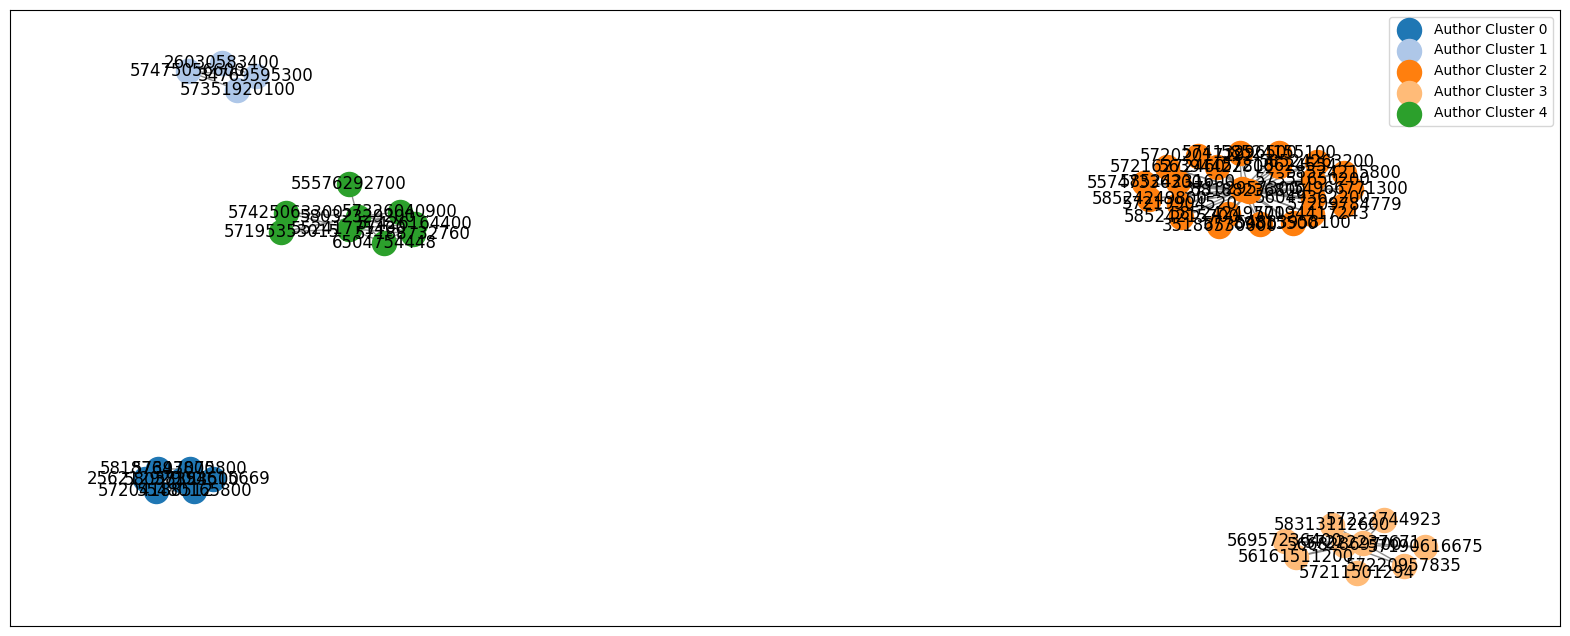

array([[-1.68281198e-01, -3.90956877e-03, -4.74607110e-01, ...,
         7.94252381e-03, -4.54536736e-01,  1.84392855e-01],
       [-1.40589982e-01,  5.47005155e-04, -3.92332345e-01, ...,
         1.97505280e-02, -3.85042995e-01,  1.66522801e-01],
       [-1.83858812e-01,  8.24113283e-03, -4.69434917e-01, ...,
         4.54268325e-03, -4.35014188e-01,  1.75724968e-01],
       ...,
       [-5.73415101e-01,  2.86927931e-02, -3.98745954e-01, ...,
        -1.06019646e-01,  3.77840288e-02, -1.44595727e-01],
       [-5.22247016e-01,  1.54232588e-02, -3.61788869e-01, ...,
        -1.01440571e-01,  6.76529929e-02, -1.54516309e-01],
       [-4.43752468e-01,  4.74414714e-02, -3.45469981e-01, ...,
        -1.25581279e-01,  3.92441377e-02, -1.74198031e-01]], dtype=float32)

In [39]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from karateclub import DeepWalk
from itertools import cycle

# Read the CSV file
data = pd.read_csv("author_author.csv")
data = data.head(150)
# Create an empty graph
A = nx.Graph()
auth_dict = {}
node_list = []
new_temp = ""
i=0
# Iterate over the rows in the DataFrame
for _, entry in data.iterrows():
    author_1_id = entry["author_1"]
    author_2_id = entry["author_2"]
    
    # temp = auth_node_id
    # Check if nodes for author_1 and author_2 already exist in the graph
    if not A.has_node(author_1_id):
        A.add_node(author_1_id, node_type="Author", label="Author", name=author_1_id)
    
    if not A.has_node(author_2_id):
        A.add_node(author_2_id, node_type="Author", label="Author", name=author_2_id)
    
    # Check if the edge between author_1 and author_2 already exists
    if not A.has_edge(author_1_id, author_2_id):
        A.add_edge(author_1_id, author_2_id, relationship="contains")
    # if i>=100:
    #     break
    # i+=1

# Separate nodes based on their types
author_nodes = [node for node, data in A.nodes(data=True) if data["node_type"] == "Author"]

# Cluster nodes based on connectivity
clusters = list(nx.connected_components(A))

# Create a list of colors for clusters
color_list = list(plt.cm.tab20.colors)
color_cycle = cycle(color_list)

# Draw the graph
plt.figure(figsize=(20, 8))
pos = nx.spring_layout(A, seed=1) 

# nx.draw_networkx_nodes(A, pos, nodelist=author_nodes, node_color='aqua', label="Author Nodes")
for cluster in clusters:
    color = next(color_cycle)
    nx.draw_networkx_nodes(A, pos, nodelist=cluster, node_color=color, label="Author Cluster {}".format(color_list.index(color)))

nx.draw_networkx_edges(A, pos, edge_color='gray', alpha=0.9)

# Add labels
node_labels = {node: data["name"] for node, data in A.nodes(data=True)}
nx.draw_networkx_labels(A, pos, labels=node_labels)
A = nx.convert_node_labels_to_integers(A, first_label=0)
label_dict = {node: data["name"] for node, data in A.nodes(data=True)}

A = nx.convert_node_labels_to_integers(A, first_label=0)
label_dict_A = {node: data["name"] for node, data in A.nodes(data=True)}

# Show the plot
plt.legend()
plt.show()

model = DeepWalk()
model.fit(A)
embeddings_A = model.get_embedding()
embeddings_A

In [48]:
np.save("AA Embedding.npy", embeddings_A)

In [7]:
import pickle

# save graph object to file
pickle.dump(Cg, open('Citations graph.pickle', 'wb'))

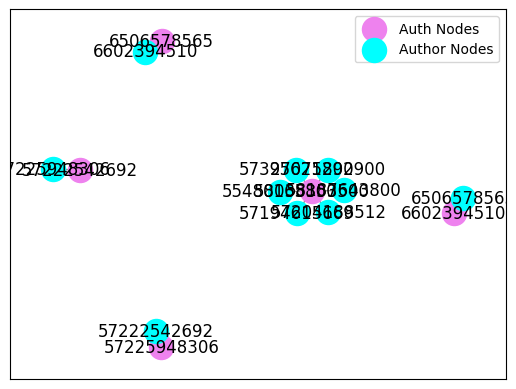

In [37]:
# load graph object from file
loaded_graph = pickle.load(open('coAuthors graph.pickle', 'rb'))
loaded_graph.remove_edges_from(nx.selfloop_edges(loaded_graph))

auth_nodes = [node for node, data in loaded_graph.nodes(data=True) if data["node_type"] == "Auth"]
author_nodes = [node for node, data in loaded_graph.nodes(data=True) if data["node_type"] == "Author"]

pos_loaded = nx.spring_layout(loaded_graph, seed=1)

nx.draw_networkx_nodes(loaded_graph, pos_loaded, nodelist=auth_nodes, node_color='violet', label="Auth Nodes")
nx.draw_networkx_nodes(loaded_graph, pos_loaded, nodelist=author_nodes, node_color='aqua', label="Author Nodes")
nx.draw_networkx_edges(loaded_graph, pos_loaded, edge_color='gray', alpha=0.9)
nx.draw_networkx_labels(loaded_graph, pos_loaded, labels=label_dict)
plt.legend()
plt.show()

PCA

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.decomposition import PCA

def PCA_2D(embeddings, label_dict, graph):
    """
    Visualizes node embeddings in a 2D space using Principal Component Analysis (PCA).

    Parameters:
        embeddings (numpy.ndarray): Node embeddings representing features in a lower-dimensional space.
        label_dict (dict): A dictionary mapping node indices to their corresponding labels or names.
        graph (networkx.Graph): The graph structure containing information about node connections.

    Returns:
        Displays the plot!

    Description:
        This function applies PCA to the input embeddings to reduce their dimensionality to 2 components.
        It then creates a scatter plot where each point represents a node in the reduced 2D space.
        Node labels are annotated on the plot, and edge connections between nodes are visualized with dashed lines.
    """
    
    # Perform PCA for dimensionality reduction
    pca = PCA(n_components=2, random_state=1)
    embeddings_pca = pca.fit_transform(embeddings)

    # Create a new figure
    plt.figure(figsize=(20, 10))

    # Scatter plot for nodes
    plt.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1], color='red', s=10, alpha=0.5)

    # Annotate each point with its label
    for i, label in enumerate(graph.nodes()):
        plt.text(embeddings_pca[i, 0], embeddings_pca[i, 1], label_dict[label],
                fontsize=8, ha='right', va='bottom', color='blue')

    # Add edges to the plot
    for edge in graph.edges():
        edge_embedding = embeddings_pca[edge[0]], embeddings_pca[edge[1]]
        plt.plot([edge_embedding[0][0], edge_embedding[1][0]],
                 [edge_embedding[0][1], edge_embedding[1][1]],
                 color='gray', linestyle='dashed', alpha=0.5)
    results = {
        'x': embeddings_pca[:, 0],
        'y': embeddings_pca[:, 1],
        'label': [label_dict[label] for label in Cg.nodes()]
    }
    df = pd.DataFrame(results)
    df.to_csv("PCA - Coauthor 2D.csv",index=False)
    # Show the plot
    plt.show()

PCA_2D(embeddings_A, label_dict, A)

In [ ]:
results = {
    'x': embeddings_pca[:, 0],
    'y': embeddings_pca[:, 1],
    'label': [label_dict[label] for label in G.nodes()]
}
df = pd.DataFrame(results)
df.to_csv("PCA - Citations 2D.csv",index=False)

TSNE

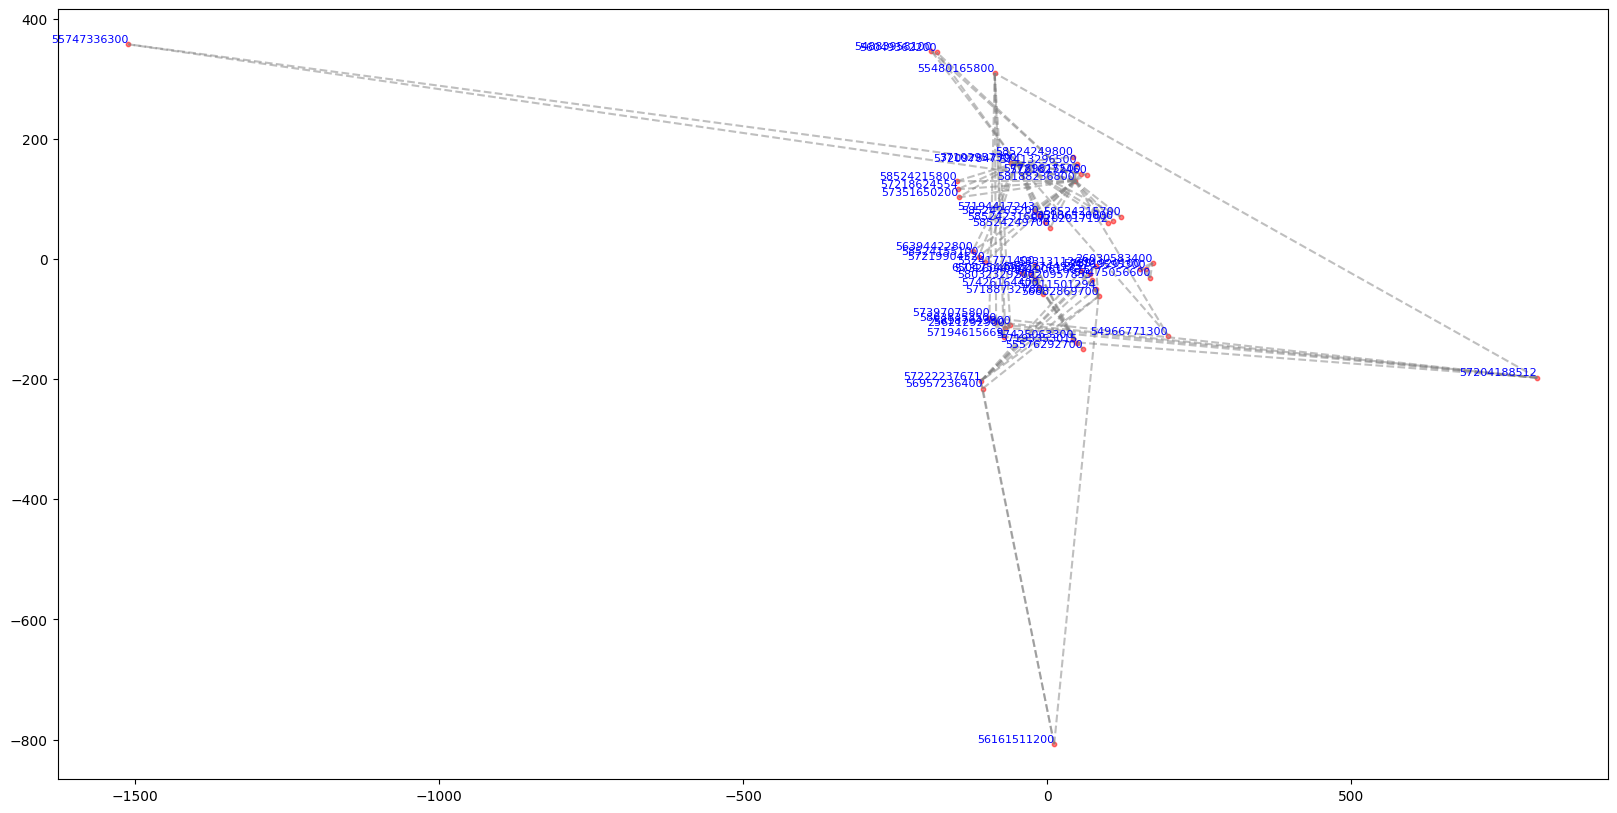

In [15]:
from sklearn.manifold import TSNE
import numpy as np

def TNSE_2D(embeddings, label_dict, graph):
    """
    Visualizes node embeddings in a 2D space using t-SNE (t-distributed Stochastic Neighbor Embedding).

    Parameters:
        embeddings (numpy.ndarray): Node embeddings representing features.
        label_dict (dict): A dictionary mapping node indices to their corresponding labels or names.
        graph (networkx.Graph): The graph structure containing information about node connections.

    Returns:
        Displays the plot!

    Description:
        This function applies t-SNE to the input embeddings to reduce their dimensionality to 2 components.
        It then creates a scatter plot where each point represents a node in the reduced 2D space.
        Node labels are annotated on the plot, and edge connections between nodes are visualized with dashed lines.
    """
    # Perform t-SNE
    tsne = TSNE(n_components=2, perplexity=1, random_state=21)
    embeddings_tsne = tsne.fit_transform(embeddings)

    # Plot the t-SNE embeddings
    plt.figure(figsize=(20, 10))
    plt.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], color='red', s=10, alpha=0.5)

    # Annotate each point with its label
    for i, label in enumerate(graph.nodes()):
        plt.text(embeddings_tsne[i, 0], embeddings_tsne[i, 1], label_dict[label], fontsize=8, ha='right', va='bottom', color='blue')
    edges = []
    # Plot edges
    for edge in graph.edges():
        edge_embedding = embeddings_tsne[edge[0]], embeddings_tsne[edge[1]]
        edges.append(edge_embedding)
        plt.plot([edge_embedding[0][0], edge_embedding[1][0]],
                 [edge_embedding[0][1], edge_embedding[1][1]],
                 color='gray', linestyle='dashed', alpha=0.5)
    results = {
    'x': embeddings_tsne[:, 0],
    'y': embeddings_tsne[:, 1],
    'label': [label_dict[label] for label in graph.nodes()]
    }
    df = pd.DataFrame(results)
    df.to_csv("TSNE - coAuthors 2D.csv",index=False)
    edges_df = pd.DataFrame(edges, columns=['Node From', 'Node To'])
    edges_df.to_csv("TSNE - coAuthors Edges 2D.csv",index=False)
    plt.show()

TNSE_2D(embeddings_A, label_dict, A)

In [32]:
results = {
    'x': embeddings_tsne[:, 0],
    'y': embeddings_tsne[:, 1],
    'label': [label_dict[label] for label in G.nodes()]
}
df = pd.DataFrame(results)
df.to_csv("TSNE - cocitations xy position.csv",index=False)

# Graph Queries

Author_Author

6


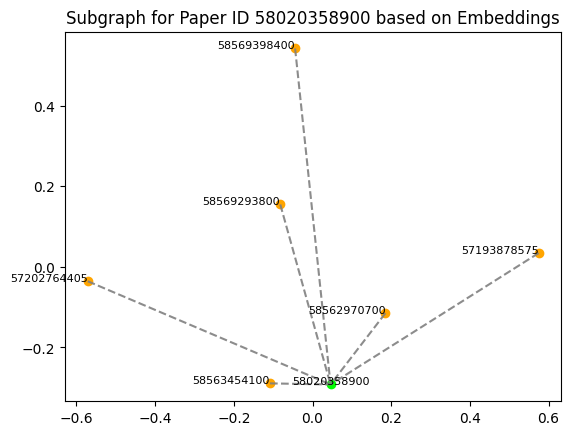

In [109]:
import networkx as nx
import matplotlib.pyplot as plt
from karateclub import DeepWalk
from sklearn.decomposition import PCA

rev_dict={}
# label_dict = {node: data["name"] for node, data in G.nodes(data=True)}
for key, value in label_dict.items():
    rev_dict[value]=int(key)
    
# Choose a specific paper node
target_author_id = 58020358900
selected_author_id = rev_dict[target_author_id]

# Extract the embedding for the chosen paper node
selected_author_embedding = embeddings[selected_author_id]

# Get the neighbors (connected nodes) of the selected paper
neighbor_nodes = list(G.neighbors(selected_author_id)) + [selected_author_id]

# Create a subgraph centered at the selected paper
subgraph = nx.ego_graph(G, selected_author_id)

# Extract embeddings for nodes in the subgraph
subgraph_embeddings = embeddings[list(subgraph.nodes)]

# Find the target node's position in the embedding list
loc = 0
for i in subgraph_embeddings:
    if (selected_author_embedding == i).any():
        print(loc)
        break
    loc+=1

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2, random_state=2)
pca_result = pca.fit_transform(subgraph_embeddings)

# Create a scatter plot with labels
plt.scatter(pca_result[loc, 0], pca_result[loc, 1], color='lime', label="Auth")

# Add connected Author nodes to the plot with labels
for neighbor_id in neighbor_nodes:
    if neighbor_id != selected_author_id:  # Skip the selected paper node
        neighbor_embedding = embeddings[neighbor_id]
        neighbor_pca_result = pca.transform(neighbor_embedding.reshape(1, -1))
        plt.scatter(neighbor_pca_result[:, 0], neighbor_pca_result[:, 1], color='orange', label="Author")
        plt.text(neighbor_pca_result[:, 0], neighbor_pca_result[:, 1], str(label_dict[neighbor_id]), fontsize=8, ha='right')

# Add edges to the plot
for edge in subgraph.edges():
    edge_embedding = embeddings[edge[0]], embeddings[edge[1]]
    edge_pca_result = pca.transform(edge_embedding)
    plt.plot(edge_pca_result[:, 0], edge_pca_result[:, 1], color='gray', linestyle='dashed', alpha=0.9)

# Add label for the selected paper node
author_label = label_dict[selected_author_id]
plt.text(pca_result[loc, 0], pca_result[loc, 1], author_label, fontsize=8, ha='center')

plt.title(f"Subgraph for Paper ID {author_label} based on Embeddings")
# plt.legend()
plt.show()

Paper_Author

{1: 0, 2: 5, 3: 10, 6: 12, 7: 14, 8: 16, 9: 19, 10: 21, 11: 36, 12: 39, 13: 50, 14: 649, 15: 58, 16: 70, 17: 79, 18: 96, 19: 102, 20: 119, 21: 127, 23: 134, 24: 145, 25: 153, 26: 165, 27: 171, 29: 175, 30: 185, 31: 198, 32: 203, 33: 212, 34: 216, 35: 219, 36: 224, 37: 690, 38: 230, 39: 232, 40: 242, 41: 247, 42: 249, 44: 259, 46: 332, 47: 335, 48: 360, 49: 373, 50: 378, 51: 382, 52: 394, 53: 403, 54: 417, 56: 420, 57: 572, 58: 428, 59: 431, 60: 437, 61: 440, 62: 446, 63: 453, 64: 455, 65: 500, 66: 502, 67: 505, 68: 508, 69: 522, 70: 530, 71: 547, 72: 553, 73: 556, 74: 567, 75: 577, 77: 583, 78: 588, 79: 597, 80: 607, 81: 623, 82: 630, 83: 633, 84: 639, 85: 645, 86: 653, 87: 657, 88: 676, 89: 678, 90: 686, 91: 694, 92: 697, 93: 699, 94: 710, 95: 719, 96: 725, 97: 736, 98: 755, 99: 762, 100: 773, 101: 807, 102: 817, 103: 823, 104: 838, 105: 849, 106: 863, 107: 878, 108: 887, 109: 898, 110: 905, 111: 915, 113: 948, 114: 951, 115: 966, 116: 975, 118: 991, 119: 998, 120: 1002, 121: 1011, 12

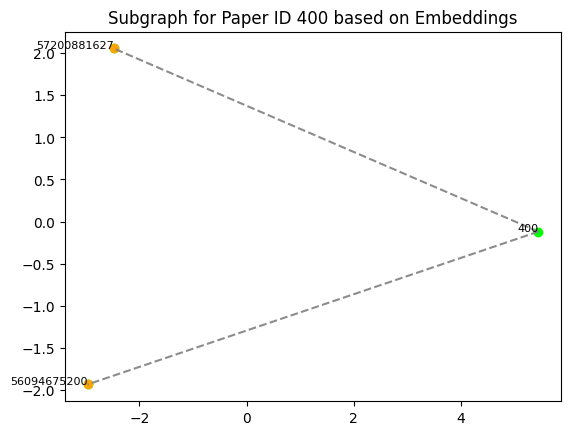

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
from karateclub import DeepWalk
from sklearn.decomposition import PCA

# label_dict = {node: data["name"] for node, data in G.nodes(data=True)}
print(paper_dict)
target_paper_id = 400
loc = 0
for key,value in label_dict.items():
    if value == target_paper_id:
        selected_paper_id = key
    loc+=1
# Choose a specific paper node
# selected_paper_id = paper_dict[target_paper_id]

# Extract the embedding for the chosen paper node
selected_paper_embedding = embeddings[selected_paper_id]

# Get the neighbors (connected nodes) of the selected paper
neighbor_nodes = list(G.neighbors(selected_paper_id)) + [selected_paper_id]

# Create a subgraph centered at the selected paper
subgraph = nx.ego_graph(G, selected_paper_id)

# Extract embeddings for nodes in the subgraph
subgraph_embeddings = embeddings[list(subgraph.nodes)]

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2, random_state=1)
pca_result = pca.fit_transform(subgraph_embeddings)

# Create a scatter plot with labels
plt.scatter(pca_result[:, 0], pca_result[:, 1], color='lime', label="Paper")

# Add connected Author nodes to the plot with labels
for neighbor_id in neighbor_nodes:
    if neighbor_id != selected_paper_id:  # Skip the selected paper node
        neighbor_embedding = embeddings[neighbor_id]
        neighbor_pca_result = pca.transform(neighbor_embedding.reshape(1, -1))
        plt.scatter(neighbor_pca_result[:, 0], neighbor_pca_result[:, 1], color='orange', label="Author")
        plt.text(neighbor_pca_result[:, 0], neighbor_pca_result[:, 1], str(label_dict[neighbor_id]), fontsize=8, ha='right')

# Add edges to the plot
for edge in subgraph.edges():
    edge_embedding = embeddings[edge[0]], embeddings[edge[1]]
    edge_pca_result = pca.transform(edge_embedding)
    plt.plot(edge_pca_result[:, 0], edge_pca_result[:, 1], color='gray', linestyle='dashed', alpha=0.9)

# Add label for the selected paper node
paper_label = label_dict[selected_paper_id]
plt.text(pca_result[0, 0], pca_result[0, 1], paper_label, fontsize=8, ha='right')

plt.title(f"Subgraph for Paper ID {paper_label} based on Embeddings")
# plt.legend()
plt.show()